In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('ex1data1.txt', 
                   sep = ',',
                   names = ['population','foodTruckProfit'],
                   header = None)

print("ex1data1.m :")
print("The population if a city and a profit of one food truck in the city")
data

ex1data1.m :
The population if a city and a profit of one food truck in the city


,population,foodTruckProfit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


## Part 1: Basic Function

In [2]:
# Warmup, identity matrix using numpuy.identity
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Part 2: Plotting

In [3]:
X = data[['population']]
y = data[['foodTruckProfit']]

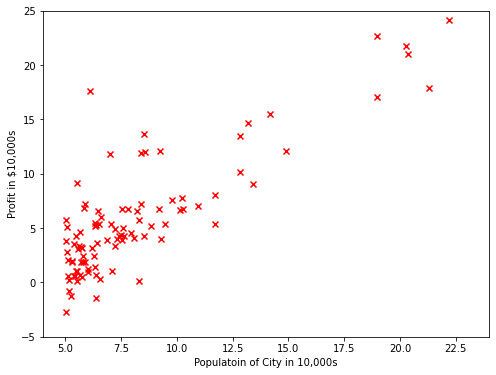

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize = (8,6))
plt.xlim([4,24])
plt.ylim([-5,25])
plt.scatter(X,y,marker = 'x',color = 'r')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Populatoin of City in 10,000s')
plt.show()

## Part 3: Cost and Gradient descent

In [6]:
X['ones'] = 1
X = X[['ones','population']]
theta = np.zeros((2,1))

iteration = 1500
alpha = 0.01

In [7]:
def computeCost(X,y,theta):
    
    m = len(y)
    J = 0
    J = 1/(2* m) * sum((np.dot(X.values,theta) - y.values)**2)
    
    return J

In [8]:
J = computeCost(X,y,theta)
print("expected value: 32.07, cost computed: %s \n"% round(float(J),2))

print("further testing with theta = [-1; 2].\nexpected value: 52.24, Cost computed: %s " % round(float(computeCost(X,y,np.array([[-1],[2]]))),2))


expected value: 32.07, cost computed: 32.07 

further testing with theta = [-1; 2].
expected value: 52.24, Cost computed: 54.24 


In [9]:
def gradientDescent(X,y,theta,alpha,num_iters):
   
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters ):
        theta = theta  - alpha/m *np.dot(X.values.T, (np.dot(X.values, theta) - y.values ))
        J_history[i] = computeCost(X,y,theta)
    
    return theta, J_history

In [11]:
t,j = gradientDescent(X,y,theta,alpha,iteration)
print("running gradient descent, the theta found by gradient descent is : \n" , t)
print("where the expected theta value(approx) is : \n [[-3.6303\n 1.1664]]")


running gradient descent, the theta found by gradient descent is : 
 [[-3.63029144]
 [ 1.16636235]]
where the expected theta value(approx) is : 
 [[-3.6303
 1.1664]]


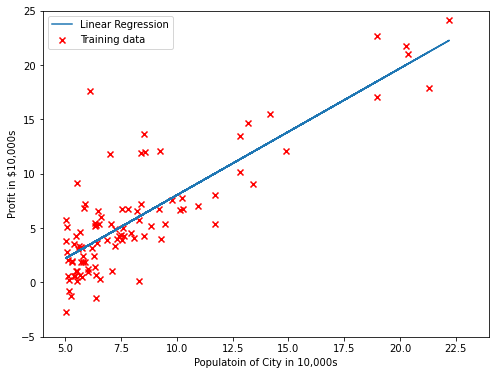

In [12]:

plt.figure(figsize = (8,6))
plt.xlim([4,24])
plt.ylim([-5,25])
sctX = X['population']
sctY = y['foodTruckProfit']
plt.ylabel('Profit in $10,000s')
plt.xlabel('Populatoin of City in 10,000s')
plt.scatter(sctX,sctY,marker = 'x',color = 'r', label = 'Training data')

x = X.values[:,1]
y2 = np.dot(X,t)
m,b = np.polyfit(x,y2,1)
plt.plot(x, m*x + b, label = 'Linear Regression')
plt.legend()

In [13]:
print("predict value for population sizes of 35,000 and 70,000")

predict1 =np.dot(np.array(([1,3.5])), t)
print("for population of 35,000: ", predict1.item() * 100000)

predict2 = np.dot(np.array(([1, 7])), t)
print("for population of 70,000: ", predict2.item() * 100000)


predict value for population sizes of 35,000 and 70,000
for population of 35,000:  45197.678677017626
for population of 70,000:  453424.5012944713


## Multi Part: Feature Normalization

In [14]:
data = pd.read_csv('ex1data2.txt',
                    sep = ',',
                    names = ['size','bedrooms','price'],
                   header = None)
data

X = data.values[:,0:2]

y = data.values[:,2]
y = y.reshape(len(y),1)
m  = len(y)

In [15]:
print('first 10 examples of the dataset:')
data.head(10)

first 10 examples of the dataset:


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [16]:
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1,X_norm.shape[1]))
    sigma = np.zeros((1,X_norm.shape[1]))
    
    #mean of features and subtract from the dataset 
    mu = np.mean(X_norm)
    sigma = np.std(X_norm)
    X_norm = X_norm - mu
    X_norm = X_norm / sigma    
    return X_norm, mu, sigma

In [17]:
X_norm, mu, sigma = featureNormalize(X)
X_norm = np.c_[ np.ones(m),X_norm]


## Multivariable Cost function and Gradient Descent

In [18]:
alpha = 0.03
num_iters = 400
theta =np.zeros((3,1))

In [19]:
def computeCostMulti(X,y,theta):
    m= len(y)
    J = 0
    J = 1/(2*m) * np.dot((np.dot(X,theta) - y).T, (np.dot(X,theta) - y))
    return J

In [20]:
def gradientDescentMulti(X,y,theta,alpha,num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):
        
        theta = theta  - alpha/m * np.dot( (np.dot(X, theta) - y).T , X).T
        
        J_history[i] = computeCostMulti(X,y,theta)  
    
    return theta, J_history
        

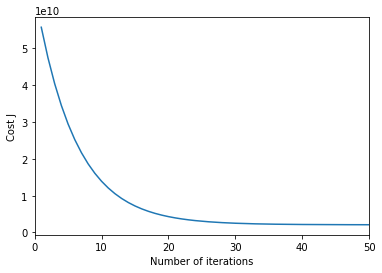

In [21]:
t, j = gradientDescentMulti(X_norm,y,theta,alpha,num_iters)

x = [i+ 1 for i in range(j.shape[0])]
plt.xlim(0,50)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.plot(x, j)

##  Normal Equations

In [22]:
print("for house is 1650 sqr-ft with 3 bedrooms")
xtest = [1650,3]
xtest = (xtest - mu) / sigma
np.dot(np.r_[np.ones(1),xtest], t)

for house is 1650 sqr-ft with 3 bedrooms


array([293452.11173791])

In [23]:
from numpy.linalg import inv

def normalEqn(X,y):
    theta = np.zeros((X.shape[1],1))
#     theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T,y))
    theta = np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

    return theta

In [24]:
tt = normalEqn(X,y)

In [25]:
# np.dot([1,1650., 3], normalEqn(X,y))
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)
X = np.c_[ np.ones(m),X]

print("predict the house price for one is 1650 square feet with 3 bedrooms:")
h(normalEqn(X,y),[1,1650.,3])

predict the house price for one is 1650 square feet with 3 bedrooms:


array([293081.46433489])